In [1]:
#version->0.21.0
import mlxtend
mlxtend.__version__

'0.21.0'

In [1]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
#import mlrose
from mlxtend.classifier import StackingClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn import model_selection

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import cross_val_predict
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.evaluate import confusion_matrix

In [3]:
x = np.genfromtxt('preprocessed_x_bathroom.csv', delimiter=',')
y = np.genfromtxt('preprocessed_y_bathroom.csv', delimiter=',', dtype= None)

In [4]:
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators = 200)
adb = AdaBoostClassifier(base_estimator = RandomForestClassifier(), n_estimators=50, learning_rate=1.0, 
                         algorithm='SAMME.R', random_state=None)
gb = GradientBoostingClassifier()
lr = LogisticRegression()
xgb = XGBClassifier(n_estimators=200)

In [9]:
sclf = StackingClassifier(classifiers=[dt,rf,adb,gb,xgb],
                          use_probas=True,
                          average_probas=False,
                          meta_classifier=lr)

In [10]:
fin_pred = cross_val_predict(sclf, x, y, cv=3)

In [7]:
feature_names=[]
for names in y:
  if names not in feature_names:
    feature_names.append(names)
#feature_names

[b'sitting', b'driving', b'eating', b'lying', b'using_computer', b'walking']

Ensemble
                   precision    recall  f1-score   support

       b'driving'       0.51      0.32      0.39       130
        b'eating'       0.32      0.30      0.31       153
         b'lying'       0.54      0.39      0.46       183
       b'sitting'       0.61      0.67      0.64       642
b'using_computer'       0.74      0.84      0.79       828
       b'walking'       0.78      0.26      0.39        96

         accuracy                           0.65      2032
        macro avg       0.58      0.46      0.50      2032
     weighted avg       0.64      0.65      0.63      2032



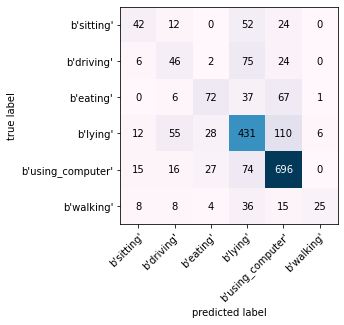

In [12]:
print("Ensemble")
print(classification_report(y, fin_pred))

cm = confusion_matrix(y_target=y, 
            y_predicted=fin_pred, 
            binary=False)
fig,ax=plot_confusion_matrix(conf_mat=cm
              ,show_absolute=True
              ,show_normed=False
              ,colorbar=False
              ,class_names=feature_names
              ,cmap='PuBu'
              ,fontcolor_threshold=0.8
              )
plt.show()